In [1]:
import tensorflow as tf
import os
import sys
from tensorflow import keras
import sklearn
from tensorflow.python.keras import backend as K
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from skimage import io
import numpy as np
import matplotlib.pyplot as plt
import cv2
from cv2 import Canny
from skimage.morphology import dilation, erosion, white_tophat, skeletonize
from skimage.morphology import disk 
from skimage import transform

from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator

In [2]:
class_names = ['MALIGNANTMASSES', 'CALC', 'BENIGNMASSES', 'NORM']
class_names_label = {class_names:i for i, class_names in enumerate(class_names)}
print(class_names_label)

IMAGE_SIZE = (224, 224, 3)

def load_data():
    main_directory = r"C:\Users\hp\Documents\CursoML\processed"
    CATEGORY = ["Training", "Testing"]
    
    output = []
    
    for category in CATEGORY: 
        path = os.path.join(main_directory, category)
        print(path)
        
        images = []
        labels = []
        
       # print("Loading {}".format(category))
        
        for folder in os.listdir(path):
            print(folder)
            label = list(class_names_label.values())[int(folder)-1]
            
            for file in os.listdir(os.path.join(path, folder)):
                img_path = os.path.join(os.path.join(path, folder), file)
                
                image = io.imread(img_path, as_gray=True, plugin='matplotlib')
                image = transform.resize(image, IMAGE_SIZE)
                
                images.append(image)
                labels.append(label)
                
        images = np.array(images, dtype='float32')
        labels = np.array(labels, dtype='int32')
        
        output.append((images, labels))
        
    return output

{'MALIGNANTMASSES': 0, 'CALC': 1, 'BENIGNMASSES': 2, 'NORM': 3}


In [3]:
(train_images, train_labels), (test_images, test_labels) = load_data()  

C:\Users\hp\Documents\CursoML\processed\Training
1
2
3
4
C:\Users\hp\Documents\CursoML\processed\Testing
1
2
3
4


In [4]:
model = Sequential()
model.add(Conv2D(input_shape=(224,224,3),filters=128,kernel_size=(5,5),padding="same", activation="linear"))
model.add(Conv2D(filters=64,kernel_size=(5,5),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(5,5), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(5,5), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(5,5), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(5,5), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(5,5), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(5,5), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(5,5), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(5,5), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(5,5), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(5,5), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(5,5), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4, activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 128)     9728      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      204864    
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     204928    
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     409728    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                    

In [5]:
model.compile(optimizer="adam", loss=keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

In [6]:
history = model.fit(train_images, train_labels, batch_size = 128, epochs = 10)

Epoch 1/10
7/7 [==============================] - 1794s 252s/step - loss: 4.5263 - accuracy: 0.2382
Epoch 2/10
7/7 [==============================] - 1801s 253s/step - loss: 3.0791 - accuracy: 0.2527
Epoch 3/10
7/7 [==============================] - 1778s 249s/step - loss: 1.4044 - accuracy: 0.2551
Epoch 4/10
7/7 [==============================] - 1766s 249s/step - loss: 1.5795 - accuracy: 0.2600
Epoch 5/10
7/7 [==============================] - 1770s 249s/step - loss: 1.3848 - accuracy: 0.2588
Epoch 6/10
7/7 [==============================] - 1751s 246s/step - loss: 1.3907 - accuracy: 0.2527
Epoch 7/10
7/7 [==============================] - 1739s 244s/step - loss: 1.3849 - accuracy: 0.2769
Epoch 8/10
7/7 [==============================] - 1722s 241s/step - loss: 1.3834 - accuracy: 0.2769
Epoch 9/10
7/7 [==============================] - 1710s 240s/step - loss: 1.3830 - accuracy: 0.2769
Epoch 10/10
7/7 [==============================] - 1725s 243s/step - loss: 1.3838 - accuracy: 0.2769

In [7]:
test_eval = model.evaluate(test_images, test_labels)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

10/10 [==============================] - 150s 15s/step - loss: 1.3831 - accuracy: 0.3077
Test loss: 1.3831113576889038
Test accuracy: 0.3076923191547394


In [21]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


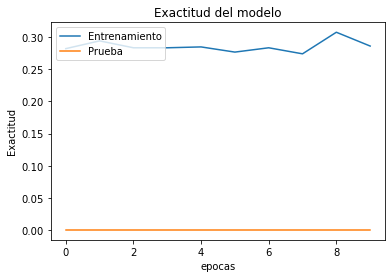

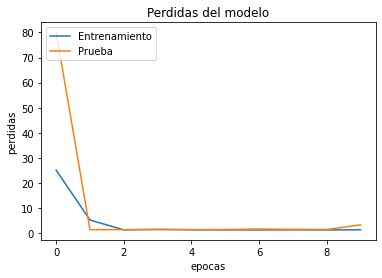

In [22]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Exactitud del modelo')
plt.ylabel('Exactitud')
plt.xlabel('epocas')
plt.legend(['Entrenamiento', 'Prueba'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Perdidas del modelo')
plt.ylabel('perdidas')
plt.xlabel('epocas')
plt.legend(['Entrenamiento', 'Prueba'], loc='upper left')
plt.show()